**E1. Cargue el conjunto de datos referente al COVID-19. Una vez cargado, obtenga en un nuevo dataframe aquellos registros cuyo continente sea Europa y muestre el número de casos y de muertes totales por COVID-19 agrupado por cada país. Cree un gráfico de barras que muestre en el eje horizontal cada uno de los países y en el eje vertical el número de casos y el número de muertos. Incluya una leyenda para identificar cada uno de los atributos. Guarde esta figura como “covidEuropa.png”. NOTA: Como no se lee bien el gráfico para todos los países europeos, se puede implementar para los diez últimos alfabéticamente.**


---



1) Cargamos el dataframe de COVID 19 en CSV y comprobamos que se ha cargado bien, para ello ejecutamos head para ver los primeros registros. Importamos las librerías que nos hacen falta: *panda* y *matplotlib.pyplot*







In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")
df.head()

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,08/02/2021,2021-05,238,8,Afghanistan,AF,AFG,38041757.0,Asia,1.33
1,01/02/2021,2021-04,267,16,Afghanistan,AF,AFG,38041757.0,Asia,2.58
2,25/01/2021,2021-03,713,43,Afghanistan,AF,AFG,38041757.0,Asia,3.34
3,18/01/2021,2021-02,557,45,Afghanistan,AF,AFG,38041757.0,Asia,3.24
4,11/01/2021,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15


2) Volcamos a nuevo dataframe dfEuropa todos los registros del dataframe original cuyo campo *continentExp* sea *Europe* y lo volvemos a comprobar con head.

In [2]:
dfEuropa = df[df.continentExp == 'Europe']
dfEuropa.head()

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
58,08/02/2021,2021-05,7209,80,Albania,AL,ALB,2862427.0,Europe,456.33
59,01/02/2021,2021-04,5853,65,Albania,AL,ALB,2862427.0,Europe,364.62
60,25/01/2021,2021-03,4584,38,Albania,AL,ALB,2862427.0,Europe,303.20
61,18/01/2021,2021-02,4095,36,Albania,AL,ALB,2862427.0,Europe,288.29
62,11/01/2021,2021-01,4157,48,Albania,AL,ALB,2862427.0,Europe,245.35


3) Ahora vamos a agrupar por el campo *countriesAndTerritories* usando *groupby* y filtrando por las columnas que nos interesan: *cases_weekly* y *deaths_weekly* que son los que quiero sumar aplicando la función *sum*. 

In [3]:
dfEuropa.groupby(by='countriesAndTerritories')[['cases_weekly','deaths_weekly']].sum()


,cases_weekly,deaths_weekly
countriesAndTerritories,,
Albania,85336,1460
Andorra,10251,106
Armenia,168177,3123
Austria,421452,7940
Azerbaijan,231154,3158
Belarus,259499,1792
Belgium,727148,21441
Bosnia_and_Herzegovina,123944,4800
Bulgaria,223734,9331


4) Ahora vamos a generar el dataframe que vamos a usar para generar el gráfico, que lo llamaremos *dfGrafico*. Después generaremos el dicho gráfico con el método *plot.bar()* y salvaremos la figura con *savefig*. La imagen se ubicará en la sección *archivos* del menú lateral y podremos descargarla con el menú contextual de Drive

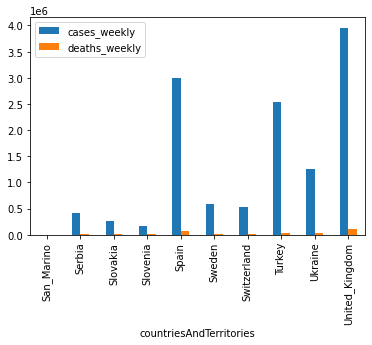

In [4]:
dfGrafico = dfEuropa.groupby(by='countriesAndTerritories')[['cases_weekly','deaths_weekly']].sum().tail(10)
dfGrafico.plot.bar()
plt.savefig("covidEuropa.png")